# Data Description

We are analyzing the crime trend in city of Chicago in the period 2015-2021.

Every record identifies a criminal activity using various features. These attributes include:

ID: Unique identifier for a record.

Case Number : Chicago Police Division Record Number.

Date: Date of the incident.

Block: The abbreviated address for the crimeinal activity.

IUCR: Internal Uniform Chicago Crime Reporting Code.

Primary Type: Type of crime

Description: Little more details about the cirminal activity

Location Description: Location where the crime occured.

Arrest: Boolean indicating whether arrest was made.

Domestic: Indicates whether incident was domestic related.

Beat: Indicates the Beat where incident occured.

District: Indicates Police District where incident occured.

Ward: The City Council District where the incident occured.

Community Area: The Community where incident occured.

FBI Code: Indicates the crime classification code.

X Coordinate: The X coordinate of the location of the incident.

Y Coordinate: The Y coordinate of the location of the incident

Year: Year the incident occured.

Updated On: The date of last update of the record.

Latitude: Lattitude of the location of the incident

Longitude: Longitude of the location of the incident.

Location: Lattitude and longitude saved as tuple.

# Work Flow

1. Save data in the MongoDB database. 
2. Do the necessary preprocessing like checing nan and duplicates, etc. 
3. Encode categorical columns to change true to 1 and false to 0.
4. Proceed to create new features like year, month, day of week, etc.
5. Do data analysis and visualization.
6. Save the new dataset created in the database.
7. Repeat the steps for 2nd and 3rd dataset.

# Saving data in the MongoDB Database

In [1]:
#importing libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
from pymongo import MongoClient

#turning off the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#creating connection with MongoDB Database
client = pymongo.MongoClient("mongodb://%s:%s@127.0.0.1" % ("dap","dap"))

In [3]:
#reading CSV file as a dataframe
df = pd.read_csv("Crimes_-_2001_to_Present.csv")

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [5]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7776553,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7776554,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7776555,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7776556,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"
7776557,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,...,29.0,25.0,15,1136773.0,1899652.0,2022,01/03/2023 03:46:28 PM,41.880802,-87.773246,"(41.880802263, -87.773245737)"


In [6]:
df.shape

(7776558, 22)

In [7]:
#saving dataframe as JSON file becuase MongoDB stores data in dictionary format
data = df.to_dict(orient="records")

In [8]:
data

[{'ID': 10224738,
  'Case Number': 'HY411648',
  'Date': '09/05/2015 01:30:00 PM',
  'Block': '043XX S WOOD ST',
  'IUCR': '0486',
  'Primary Type': 'BATTERY',
  'Description': 'DOMESTIC BATTERY SIMPLE',
  'Location Description': 'RESIDENCE',
  'Arrest': False,
  'Domestic': True,
  'Beat': 924,
  'District': 9.0,
  'Ward': 12.0,
  'Community Area': 61.0,
  'FBI Code': '08B',
  'X Coordinate': 1165074.0,
  'Y Coordinate': 1875917.0,
  'Year': 2015,
  'Updated On': '02/10/2018 03:50:01 PM',
  'Latitude': 41.815117282,
  'Longitude': -87.669999562,
  'Location': '(41.815117282, -87.669999562)'},
 {'ID': 10224739,
  'Case Number': 'HY411615',
  'Date': '09/04/2015 11:30:00 AM',
  'Block': '008XX N CENTRAL AVE',
  'IUCR': '0870',
  'Primary Type': 'THEFT',
  'Description': 'POCKET-PICKING',
  'Location Description': 'CTA BUS',
  'Arrest': False,
  'Domestic': False,
  'Beat': 1511,
  'District': 15.0,
  'Ward': 29.0,
  'Community Area': 25.0,
  'FBI Code': '06',
  'X Coordinate': 1138875.0

In [9]:
#creating database variable to save the records to MongoDB
db = client["MachineLearning"] #MachineLearning is the name of the database

In [10]:
print(db)

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'MachineLearning')


In [11]:
db.ChicagoCrime.insert_many(data)

# Data Preprocessing

In [12]:
#getting data from MongoDB
client = pymongo.MongoClient("mongodb://%s:%s@127.0.0.1" % ("dap","dap"))
mydb = client["MachineLearning"]
mycol = mydb["ChicagoCrime"]
df_mongo = pd.DataFrame(list(mycol.find()))
df_mongo.drop("_id",inplace=True,axis=1) 
df_mongo.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [15]:
#checking missing values for each column 
df_mongo.isnull().sum().sort_values(ascending=False)

Ward                    614848
Community Area          613476
Location                 86510
Longitude                86510
Latitude                 86510
Y Coordinate             86510
X Coordinate             86510
Location Description     10325
District                    47
Case Number                  4
Domestic                     0
Beat                         0
Arrest                       0
Description                  0
FBI Code                     0
Primary Type                 0
IUCR                         0
Year                         0
Updated On                   0
Block                        0
Date                         0
ID                           0
dtype: int64

In [16]:
#checking the rows with missing values
df_mongo[df_mongo.isnull().any(axis=1)].head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
9,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
54,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
84,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
158,11645648,JC212959,01/01/2018 08:00:00 AM,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,30.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
279,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
313,11645557,JC212685,04/01/2018 12:01:00 AM,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,6.0,44.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
383,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
392,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
445,11645833,JC213044,05/05/2012 12:25:00 PM,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,29.0,25.0,11,NaN,NaN,2012,04/06/2019 04:04:43 PM,NaN,NaN,NaN


We will drop the rows that have missing values. Since we have a fairly large dataset, it would not impact our analysis.

In [17]:
#dropping rows with missing values and creating df_new without missing values
newdf = df.dropna()

In [18]:
#checking how many observations we have after dropping missing value rows
newdf.shape

(7076706, 22)

In [19]:
#rechecking missing values for each column 
newdf.isnull().sum().sort_values(ascending=False)

ID                      0
Case Number             0
Longitude               0
Latitude                0
Updated On              0
Year                    0
Y Coordinate            0
X Coordinate            0
FBI Code                0
Community Area          0
Ward                    0
District                0
Beat                    0
Domestic                0
Arrest                  0
Location Description    0
Description             0
Primary Type            0
IUCR                    0
Block                   0
Date                    0
Location                0
dtype: int64

We have successfully cleaned rows with NaN values.

A lot of features reflect the same information. X Coodinate, Y Coordinate, Location, Latitude, Longitude, District, Ward, Community Area - they all inform about the place where the crime took place. We can drop some of them before proceeding with the analysis.

Besides this, the columns - ID, Block, IUCR, Description, Community Area, Updated On, Location are some columns that can be dropped.

In [20]:
#dropping unneccesary columns
newdf.drop(['ID', 'Block', 'IUCR', 'Description', 'Community Area', 'Updated On', 'Location'], axis=1, inplace=True)
newdf

,Case Number,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,HY411648,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,True,924,9.0,12.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000
1,HY411615,09/04/2015 11:30:00 AM,THEFT,CTA BUS,False,False,1511,15.0,29.0,06,1138875.0,1904869.0,2015,41.895080,-87.765400
3,HY411595,09/05/2015 12:45:00 PM,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650
4,HY411610,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121
5,HY411435,09/05/2015 10:55:00 AM,BURGLARY,RESIDENCE,False,False,614,6.0,21.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776553,JF420478,09/01/2022 05:00:00 AM,OTHER OFFENSE,RESIDENCE,False,True,1934,19.0,44.0,26,1172497.0,1919410.0,2022,41.934305,-87.641485
7776554,JF420319,07/08/2022 12:00:00 AM,DECEPTIVE PRACTICE,STREET,False,False,531,5.0,9.0,11,1179966.0,1828818.0,2022,41.685544,-87.616813
7776555,JF420102,09/27/2022 11:00:00 AM,THEFT,RESIDENCE,False,False,331,3.0,5.0,06,1193181.0,1859005.0,2022,41.768068,-87.567453
7776556,JF420427,09/03/2022 10:25:00 AM,NARCOTICS,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,18,1140553.0,1933418.0,2022,41.973391,-87.758535


In [21]:
#dropping columns with similar information
newdf.drop(['X Coordinate', 'Y Coordinate'], axis=1, inplace=True)
newdf

,Case Number,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude
0,HY411648,09/05/2015 01:30:00 PM,BATTERY,RESIDENCE,False,True,924,9.0,12.0,08B,2015,41.815117,-87.670000
1,HY411615,09/04/2015 11:30:00 AM,THEFT,CTA BUS,False,False,1511,15.0,29.0,06,2015,41.895080,-87.765400
3,HY411595,09/05/2015 12:45:00 PM,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,18,2015,41.937406,-87.716650
4,HY411610,09/05/2015 01:00:00 PM,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,08A,2015,41.881903,-87.755121
5,HY411435,09/05/2015 10:55:00 AM,BURGLARY,RESIDENCE,False,False,614,6.0,21.0,05,2015,41.744379,-87.658431
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776553,JF420478,09/01/2022 05:00:00 AM,OTHER OFFENSE,RESIDENCE,False,True,1934,19.0,44.0,26,2022,41.934305,-87.641485
7776554,JF420319,07/08/2022 12:00:00 AM,DECEPTIVE PRACTICE,STREET,False,False,531,5.0,9.0,11,2022,41.685544,-87.616813
7776555,JF420102,09/27/2022 11:00:00 AM,THEFT,RESIDENCE,False,False,331,3.0,5.0,06,2022,41.768068,-87.567453
7776556,JF420427,09/03/2022 10:25:00 AM,NARCOTICS,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,18,2022,41.973391,-87.758535


In [22]:
#descriptive analysis of the data
newdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Case Number,7076706,7076182,HJ590004,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,7076706,2931539,01/01/2007 12:01:00 AM,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Type,7076706,35,THEFT,1497510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Description,7076706,215,STREET,1822920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrest,7076706,2,False,5243714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domestic,7076706,2,False,6084557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beat,7076706.0,NaN,NaN,NaN,1181.95049,702.324025,111.0,621.0,1034.0,1724.0,2535.0
District,7076706.0,NaN,NaN,NaN,11.283779,6.94666,1.0,6.0,10.0,17.0,31.0
Ward,7076706.0,NaN,NaN,NaN,22.737872,13.845154,1.0,10.0,23.0,34.0,50.0
FBI Code,7076706,26,06,1497510,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Columns - Beat, District, Ward, Year - seem to have outliers.

In [23]:
#checking if columns have the right data types or not
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7076706 entries, 0 to 7776557
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Primary Type          object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   FBI Code              object 
 10  Year                  int64  
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 661.4+ MB


We can change the data type of Date column to 'Datetime' if required. Rest columns have appropriate data types.

In [24]:
#checking for duplicate rows if any
newdf.duplicated().sum()

231

In [25]:
#dropping duplicate rows
newdf.drop_duplicates(inplace=True)

In [26]:
#rechecking the shape
newdf.shape

(7076475, 13)

In [27]:
#checking data types of features
newdf.dtypes

Case Number              object
Date                     object
Primary Type             object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
FBI Code                 object
Year                      int64
Latitude                float64
Longitude               float64
dtype: object

District and Ward are having float data types. They need to be converted to string as they represent an entity. 

# Data Transformation

In [28]:
#encoding categorical columns like arrest and domestic
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
newdf['Arrest']= label_encoder.fit_transform(newdf['Arrest'])
newdf['Arrest'].value_counts()

0    5243636
1    1832839
Name: Arrest, dtype: int64

In [29]:
newdf['Domestic']= label_encoder.fit_transform(newdf['Domestic'])
newdf['Domestic'].value_counts()

0    6084355
1     992120
Name: Domestic, dtype: int64

We have changes True and False boolean data type columns to integer columns for ease of analysis.

In [30]:
#converting data type of date column to datetime[ns]
newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf.dtypes

Case Number                     object
Date                    datetime64[ns]
Primary Type                    object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
FBI Code                        object
Year                             int64
Latitude                       float64
Longitude                      float64
dtype: object

We have converted the date successfully to date time data type (which is the ideal data type).Let's proceed with creation of new, important features

In [31]:
#augmenting data with additional columns like year, month, day, hour, day name

#adding year column
newdf['Year'] = newdf['Date'].dt.year

#adding month of the year column
newdf['Month'] = newdf['Date'].dt.month

#adding day of the month column
newdf['Day'] = newdf['Date'].dt.day

#adding hour of the day column
newdf['Hour'] = newdf['Date'].dt.hour

#adding the week day column 
newdf['Week Day'] = newdf['Date'].dt.day_name()

newdf

,Case Number,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude,Month,Day,Hour,Week Day
0,HY411648,2015-09-05 13:30:00,BATTERY,RESIDENCE,0,1,924,9.0,12.0,08B,2015,41.815117,-87.670000,9,5,13,Saturday
1,HY411615,2015-09-04 11:30:00,THEFT,CTA BUS,0,0,1511,15.0,29.0,06,2015,41.895080,-87.765400,9,4,11,Friday
3,HY411595,2015-09-05 12:45:00,NARCOTICS,SIDEWALK,1,0,1412,14.0,35.0,18,2015,41.937406,-87.716650,9,5,12,Saturday
4,HY411610,2015-09-05 13:00:00,ASSAULT,APARTMENT,0,1,1522,15.0,28.0,08A,2015,41.881903,-87.755121,9,5,13,Saturday
5,HY411435,2015-09-05 10:55:00,BURGLARY,RESIDENCE,0,0,614,6.0,21.0,05,2015,41.744379,-87.658431,9,5,10,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776553,JF420478,2022-09-01 05:00:00,OTHER OFFENSE,RESIDENCE,0,1,1934,19.0,44.0,26,2022,41.934305,-87.641485,9,1,5,Thursday
7776554,JF420319,2022-07-08 00:00:00,DECEPTIVE PRACTICE,STREET,0,0,531,5.0,9.0,11,2022,41.685544,-87.616813,7,8,0,Friday
7776555,JF420102,2022-09-27 11:00:00,THEFT,RESIDENCE,0,0,331,3.0,5.0,06,2022,41.768068,-87.567453,9,27,11,Tuesday
7776556,JF420427,2022-09-03 10:25:00,NARCOTICS,RESIDENCE - YARD (FRONT / BACK),1,0,1623,16.0,45.0,18,2022,41.973391,-87.758535,9,3,10,Saturday


We have extracted the month, day and hour from the ‘Date’ column. Let us now drop Date column to avoid similar information.

In [32]:
newdf.drop(['Date'], axis=1, inplace=True)
newdf

,Case Number,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude,Month,Day,Hour,Week Day
0,HY411648,BATTERY,RESIDENCE,0,1,924,9.0,12.0,08B,2015,41.815117,-87.670000,9,5,13,Saturday
1,HY411615,THEFT,CTA BUS,0,0,1511,15.0,29.0,06,2015,41.895080,-87.765400,9,4,11,Friday
3,HY411595,NARCOTICS,SIDEWALK,1,0,1412,14.0,35.0,18,2015,41.937406,-87.716650,9,5,12,Saturday
4,HY411610,ASSAULT,APARTMENT,0,1,1522,15.0,28.0,08A,2015,41.881903,-87.755121,9,5,13,Saturday
5,HY411435,BURGLARY,RESIDENCE,0,0,614,6.0,21.0,05,2015,41.744379,-87.658431,9,5,10,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776553,JF420478,OTHER OFFENSE,RESIDENCE,0,1,1934,19.0,44.0,26,2022,41.934305,-87.641485,9,1,5,Thursday
7776554,JF420319,DECEPTIVE PRACTICE,STREET,0,0,531,5.0,9.0,11,2022,41.685544,-87.616813,7,8,0,Friday
7776555,JF420102,THEFT,RESIDENCE,0,0,331,3.0,5.0,06,2022,41.768068,-87.567453,9,27,11,Tuesday
7776556,JF420427,NARCOTICS,RESIDENCE - YARD (FRONT / BACK),1,0,1623,16.0,45.0,18,2022,41.973391,-87.758535,9,3,10,Saturday


In [33]:
#converting district and ward data type from float to string
newdf['District'] = newdf['District'].astype(str)
newdf['Ward'] = newdf['Ward'].astype(str)

In [34]:
newdf.dtypes

Case Number              object
Primary Type             object
Location Description     object
Arrest                    int64
Domestic                  int64
Beat                      int64
District                 object
Ward                     object
FBI Code                 object
Year                      int64
Latitude                float64
Longitude               float64
Month                     int64
Day                       int64
Hour                      int64
Week Day                 object
dtype: object

# Data Analysis

## Yearly Trend of The Crimes Committed

In [35]:
yt = newdf.groupby('Year').count()
yt

,Case Number,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Latitude,Longitude,Month,Day,Hour,Week Day
Year,,,,,,,,,,,,,,,
2001,3882,3882,3882,3882,3882,3882,3882,3882,3882,3882,3882,3882,3882,3882,3882
2002,345023,345023,345023,345023,345023,345023,345023,345023,345023,345023,345023,345023,345023,345023,345023
2003,471981,471981,471981,471981,471981,471981,471981,471981,471981,471981,471981,471981,471981,471981,471981
2004,467125,467125,467125,467125,467125,467125,467125,467125,467125,467125,467125,467125,467125,467125,467125
2005,449866,449866,449866,449866,449866,449866,449866,449866,449866,449866,449866,449866,449866,449866,449866
2006,445492,445492,445492,445492,445492,445492,445492,445492,445492,445492,445492,445492,445492,445492,445492
2007,435521,435521,435521,435521,435521,435521,435521,435521,435521,435521,435521,435521,435521,435521,435521
2008,419776,419776,419776,419776,419776,419776,419776,419776,419776,419776,419776,419776,419776,419776,419776
2009,385835,385835,385835,385835,385835,385835,385835,385835,385835,385835,385835,385835,385835,385835,385835


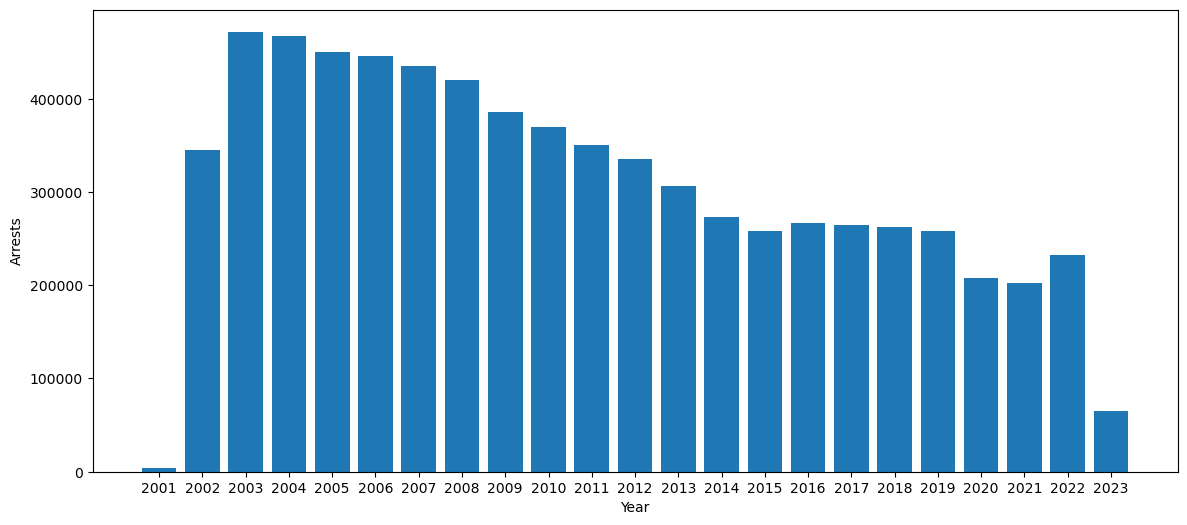

In [36]:
#visualising the yearly trend of crimes

year = range(2001,2024)

plt.figure(figsize=(14, 6))
plt.bar(year, yt['Arrest'])
plt.xticks(year)
plt.ylabel("Arrests")
plt.xlabel("Year")
plt.show()

Most crimes took place in the year 2003, followed by the year 2004 and then the year 2005. The crimes reduced significantly from 2020.

## Month with highest number of crimes

In [37]:
highcrime = newdf.groupby('Month').count()
highcrime

,Case Number,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude,Day,Hour,Week Day
Month,,,,,,,,,,,,,,,
1,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685
2,475796,475796,475796,475796,475796,475796,475796,475796,475796,475796,475796,475796,475796,475796,475796
3,567206,567206,567206,567206,567206,567206,567206,567206,567206,567206,567206,567206,567206,567206,567206
4,562218,562218,562218,562218,562218,562218,562218,562218,562218,562218,562218,562218,562218,562218,562218
5,635640,635640,635640,635640,635640,635640,635640,635640,635640,635640,635640,635640,635640,635640,635640
6,633252,633252,633252,633252,633252,633252,633252,633252,633252,633252,633252,633252,633252,633252,633252
7,665712,665712,665712,665712,665712,665712,665712,665712,665712,665712,665712,665712,665712,665712,665712
8,658966,658966,658966,658966,658966,658966,658966,658966,658966,658966,658966,658966,658966,658966,658966
9,619832,619832,619832,619832,619832,619832,619832,619832,619832,619832,619832,619832,619832,619832,619832


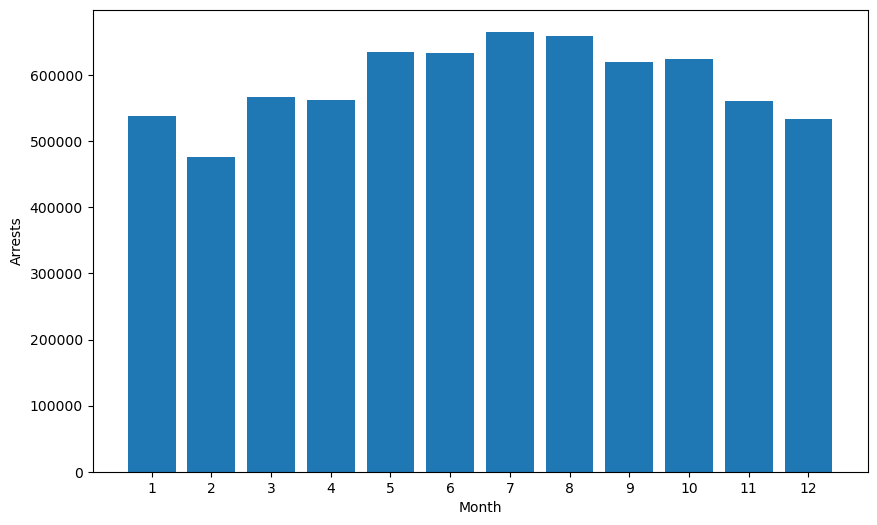

In [38]:
#visualising the monthly crimes

months = range(1,13)

plt.figure(figsize=(10, 6))
plt.bar(months, highcrime['Arrest'])
plt.xticks(months)
plt.ylabel("Arrests")
plt.xlabel("Month")
plt.show()

The month of July had the highest number of crimes. It is followed by August, which has second highest number of crimes.

Least number of crimes happen in December (Might be because of the Christmas festive season or severe cold temperatures).

## Day of month with highest number of crimes

In [39]:
highcrime1 = newdf.groupby('Day').count()
highcrime1

,Case Number,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude,Month,Hour,Week Day
Day,,,,,,,,,,,,,,,
1,270478,270478,270478,270478,270478,270478,270478,270478,270478,270478,270478,270478,270478,270478,270478
2,229816,229816,229816,229816,229816,229816,229816,229816,229816,229816,229816,229816,229816,229816,229816
3,230521,230521,230521,230521,230521,230521,230521,230521,230521,230521,230521,230521,230521,230521,230521
4,228786,228786,228786,228786,228786,228786,228786,228786,228786,228786,228786,228786,228786,228786,228786
5,231036,231036,231036,231036,231036,231036,231036,231036,231036,231036,231036,231036,231036,231036,231036
6,230995,230995,230995,230995,230995,230995,230995,230995,230995,230995,230995,230995,230995,230995,230995
7,230498,230498,230498,230498,230498,230498,230498,230498,230498,230498,230498,230498,230498,230498,230498
8,230260,230260,230260,230260,230260,230260,230260,230260,230260,230260,230260,230260,230260,230260,230260
9,230362,230362,230362,230362,230362,230362,230362,230362,230362,230362,230362,230362,230362,230362,230362


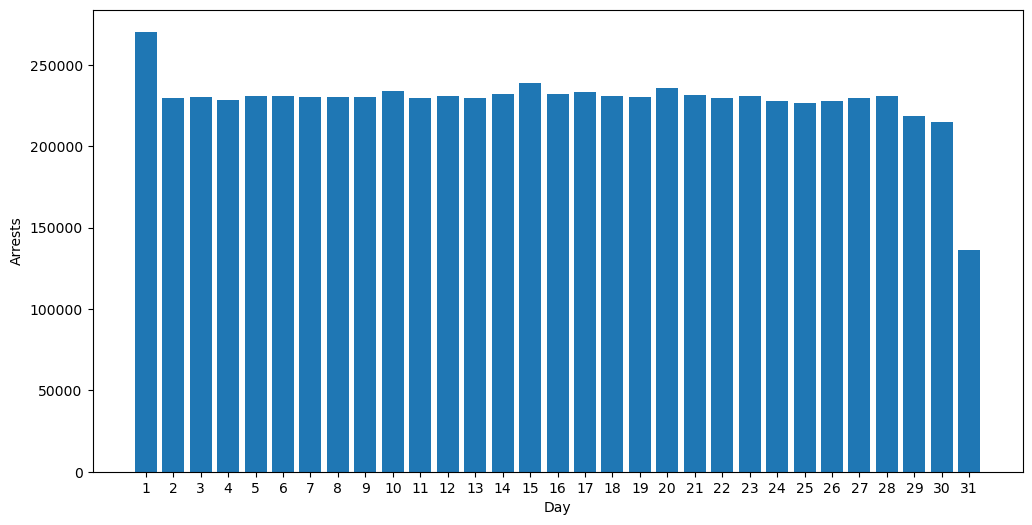

In [40]:
#visualising the daily crimes

Day = range(1,32)

plt.figure(figsize=(12, 6))
plt.bar(Day, highcrime1['Arrest'])
plt.xticks(Day)
plt.ylabel("Arrests")
plt.xlabel("Day")
plt.show()

The 1st day of the months has a very high number of crimes, while the 31st day of the months has very low number of crime committed.

## Day of the Week with highest crime

In [41]:
highcrime3 = newdf.groupby('Week Day').sum()
highcrime3

,Arrest,Domestic,Beat,Year,Latitude,Longitude,Month,Day,Hour
Week Day,,,,,,,,,
Friday,275183,136497,1258896474,2138048091,4.449416e+07,-9.322740e+07,7007708,16639840,14298804
Monday,249443,137846,1176018839,2009348525,4.181313e+07,-8.761279e+07,6613510,15670248,13187229
Saturday,259989,157808,1212962960,2040986197,4.247359e+07,-8.899171e+07,6722131,15885209,12933622
Sunday,240806,168075,1155153234,1943110193,4.043406e+07,-8.472098e+07,6418517,15154185,11979662
Thursday,267515,129702,1183865938,2022403008,4.208690e+07,-8.818577e+07,6611825,15678526,13390630
Tuesday,268247,131283,1183690625,2030411184,4.225325e+07,-8.853549e+07,6661212,15818998,13519441
Wednesday,271656,130909,1193510629,2044070405,4.253764e+07,-8.913097e+07,6713108,15924194,13601816


In [42]:
#arranging days in weekday order
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

highcrime3 = highcrime3.reindex(days) 
highcrime3

,Arrest,Domestic,Beat,Year,Latitude,Longitude,Month,Day,Hour
Week Day,,,,,,,,,
Monday,249443,137846,1176018839,2009348525,4.181313e+07,-8.761279e+07,6613510,15670248,13187229
Tuesday,268247,131283,1183690625,2030411184,4.225325e+07,-8.853549e+07,6661212,15818998,13519441
Wednesday,271656,130909,1193510629,2044070405,4.253764e+07,-8.913097e+07,6713108,15924194,13601816
Thursday,267515,129702,1183865938,2022403008,4.208690e+07,-8.818577e+07,6611825,15678526,13390630
Friday,275183,136497,1258896474,2138048091,4.449416e+07,-9.322740e+07,7007708,16639840,14298804
Saturday,259989,157808,1212962960,2040986197,4.247359e+07,-8.899171e+07,6722131,15885209,12933622
Sunday,240806,168075,1155153234,1943110193,4.043406e+07,-8.472098e+07,6418517,15154185,11979662


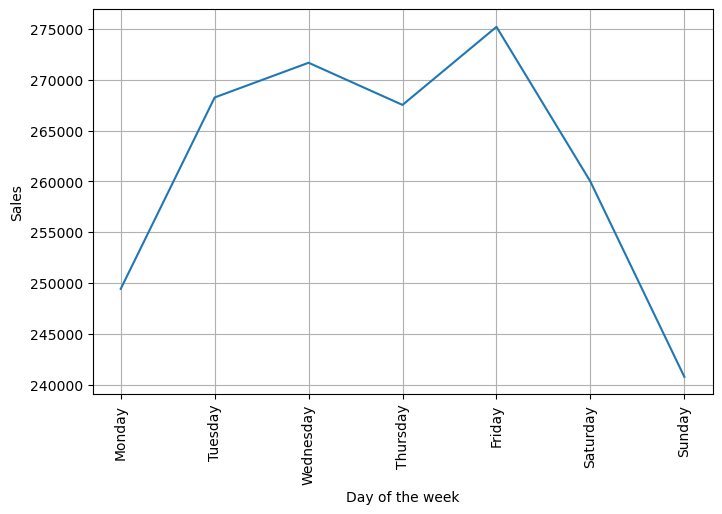

In [43]:
#visualizing day-wise sales

plt.figure(figsize=(8, 5))
plt.plot(days, highcrime3['Arrest'])
plt.xticks(days, rotation = 'vertical')
plt.xlabel('Day of the week')
plt.ylabel('Sales')
plt.grid()
plt.show()

Most crimes take place on Friday in Chicago. The week from Tuesday to Friday is very risky for people in Chicago. The weekend is relatively safer.

## Hours when maximum crimes take place

In [44]:
newdf['Counter'] = 1
worsthr = newdf.groupby('Hour').count()
worsthr

,Case Number,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude,Month,Day,Week Day,Counter
Hour,,,,,,,,,,,,,,,,
0,397661,397661,397661,397661,397661,397661,397661,397661,397661,397661,397661,397661,397661,397661,397661,397661
1,225070,225070,225070,225070,225070,225070,225070,225070,225070,225070,225070,225070,225070,225070,225070,225070
2,190352,190352,190352,190352,190352,190352,190352,190352,190352,190352,190352,190352,190352,190352,190352,190352
3,154216,154216,154216,154216,154216,154216,154216,154216,154216,154216,154216,154216,154216,154216,154216,154216
4,117238,117238,117238,117238,117238,117238,117238,117238,117238,117238,117238,117238,117238,117238,117238,117238
5,98158,98158,98158,98158,98158,98158,98158,98158,98158,98158,98158,98158,98158,98158,98158,98158
6,114611,114611,114611,114611,114611,114611,114611,114611,114611,114611,114611,114611,114611,114611,114611,114611
7,163295,163295,163295,163295,163295,163295,163295,163295,163295,163295,163295,163295,163295,163295,163295,163295
8,239563,239563,239563,239563,239563,239563,239563,239563,239563,239563,239563,239563,239563,239563,239563,239563


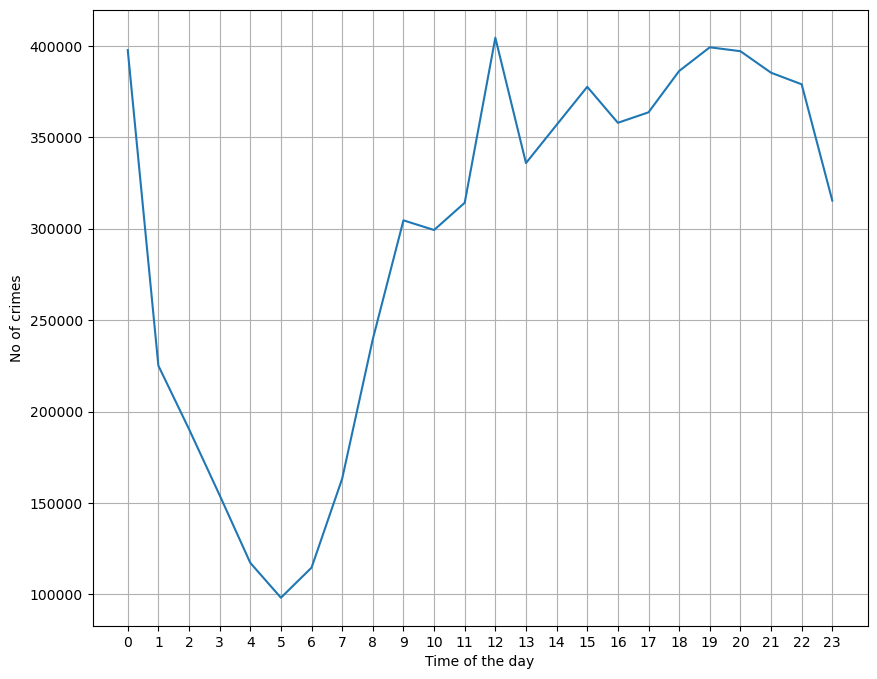

In [45]:
#visualizing hourly crimes
hours= [hour for hour, df in newdf.groupby('Hour')]

plt.figure(figsize=(10, 8))
plt.plot(hours, worsthr['Counter'])
plt.xticks(hours)
plt.xlabel('Time of the day')
plt.ylabel('No of crimes')
plt.grid()
plt.show()

From 12 noon to evening 8, most of the crimes take place. As the sun sets down, the darkness helps criminals to escape being caught easily. 

## Most popular primary type of crimes

In [46]:
newdf['Counter'] = 1
popcrimes = newdf.groupby('Primary Type')
mostpopcrimes = popcrimes.sum()['Counter']

mostpopcrimes

Primary Type
ARSON                                  11848
ASSAULT                               465116
BATTERY                              1298469
BURGLARY                              390191
CONCEALED CARRY LICENSE VIOLATION       1064
CRIM SEXUAL ASSAULT                    24127
CRIMINAL DAMAGE                       811017
CRIMINAL SEXUAL ASSAULT                 5828
CRIMINAL TRESPASS                     195857
DECEPTIVE PRACTICE                    302364
GAMBLING                               13405
HOMICIDE                               11911
HUMAN TRAFFICKING                         91
INTERFERENCE WITH PUBLIC OFFICER       17802
INTIMIDATION                            4263
KIDNAPPING                              6007
LIQUOR LAW VIOLATION                   12780
MOTOR VEHICLE THEFT                   338764
NARCOTICS                             668994
NON - CRIMINAL                            38
NON-CRIMINAL                             171
NON-CRIMINAL (SUBJECT SPECIFIED)          

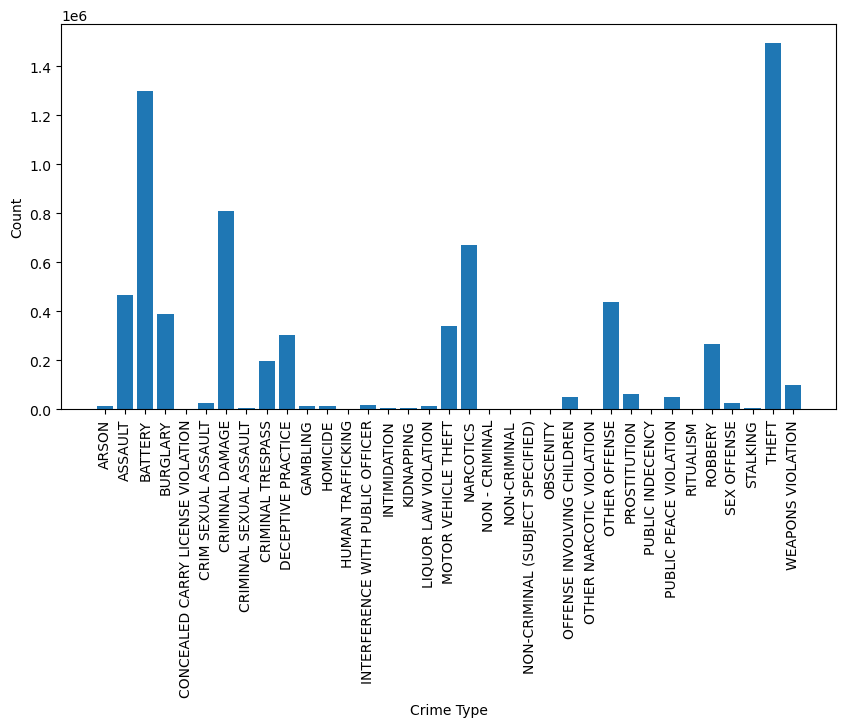

In [47]:
#visualising the most popular crime types

crime = [crime for crime, df in popcrimes]

plt.figure(figsize=(10, 5))
plt.bar(crime, mostpopcrimes)
plt.xticks(crime, rotation = 'vertical')
plt.ylabel("Count")
plt.xlabel("Crime Type")
plt.show() 

Theft and Battery are the two most notorious crimes committed in Chicago. It is followed by Criminal Damage, Narcotics, Other Offence and Robbery.

## District where maximum crimes occur

In [48]:
newdf['Counter'] = 1
popdist = newdf.groupby('District')
mostpopdist = popdist.sum()['Counter']

mostpopdist

District
1.0     289804
10.0    307059
11.0    456710
12.0    348477
14.0    269034
15.0    304487
16.0    236200
17.0    203768
18.0    315609
19.0    314972
2.0     320995
20.0    123275
21.0         4
22.0    233306
24.0    212978
25.0    402584
3.0     360433
31.0       184
4.0     405945
5.0     315706
6.0     418455
7.0     412384
8.0     478579
9.0     345527
Name: Counter, dtype: int64

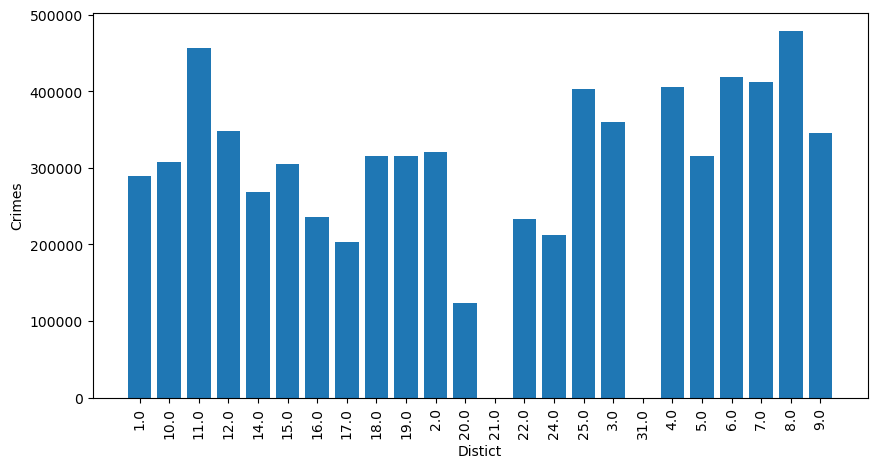

In [49]:
#visualising the most susceptible district area

crime = [crime for crime, df in popdist]

plt.figure(figsize=(10, 5))
plt.bar(crime, mostpopdist)
plt.xticks(crime, rotation = 'vertical')
plt.ylabel("Crimes")
plt.xlabel("Distict")
plt.show() 

District no 8 is the distrcit where maximum crimes occur. It is followed by District no 11, which has second highest number of crimes. 

## Ward where maximum crimes occur

In [50]:
newdf['Counter'] = 1
popward = newdf.groupby('Ward')
mostpopward = popward.sum()['Counter']

mostpopward

Ward
1.0     135212
10.0    120614
11.0     96388
12.0     86423
13.0     87143
14.0     95274
15.0    183625
16.0    203721
17.0    234688
18.0    116934
19.0     62753
2.0     251470
20.0    232598
21.0    214658
22.0     82704
23.0     90165
24.0    277297
25.0    102963
26.0    120003
27.0    266095
28.0    324400
29.0    164659
3.0     216086
30.0     96330
31.0     97025
32.0    116353
33.0     70244
34.0    198841
35.0     92288
36.0     74614
37.0    191468
38.0     73802
39.0     66478
4.0     140597
40.0     74838
41.0     74167
42.0    293700
43.0     88229
44.0     98351
45.0     72433
46.0     94967
47.0     73275
48.0     71448
49.0    101365
5.0     169804
50.0     73169
6.0     234701
7.0     192706
8.0     195893
9.0     183516
Name: Counter, dtype: int64

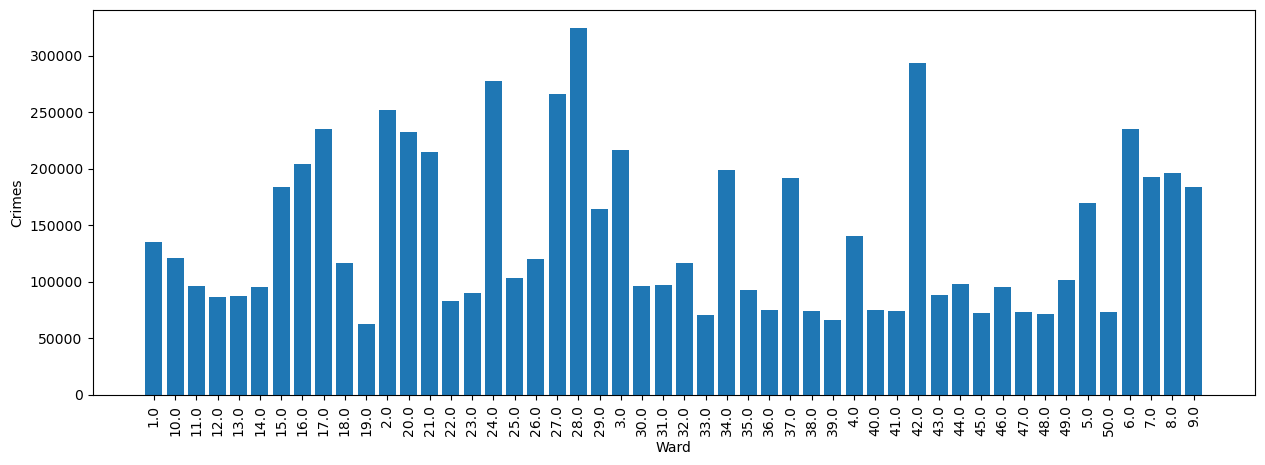

In [51]:
#visualising the most susceptible district area

crime = [crime for crime, df in popward]

plt.figure(figsize=(15, 5))
plt.bar(crime, mostpopward)
plt.xticks(crime, rotation = 'vertical')
plt.ylabel("Crimes")
plt.xlabel("Ward")
plt.show() 

Most crimes occur in Ward no 28. The second highest crimes occur in ward no 42. 

## Notorious location of crimes

In [52]:
newdf['Counter'] = 1
popcrimesloc = newdf.groupby('Location Description')
mostpopcrimesloc = popcrimesloc.sum()['Counter']

mostpopcrimesloc.sort_values(ascending = False)

Location Description
STREET                1822859
RESIDENCE             1164572
APARTMENT              830326
SIDEWALK               686754
OTHER                  239181
                       ...   
LIVERY AUTO                 1
TRUCKING TERMINAL           1
LOADING DOCK                1
POOLROOM                    1
CTA SUBWAY STATION          1
Name: Counter, Length: 215, dtype: int64

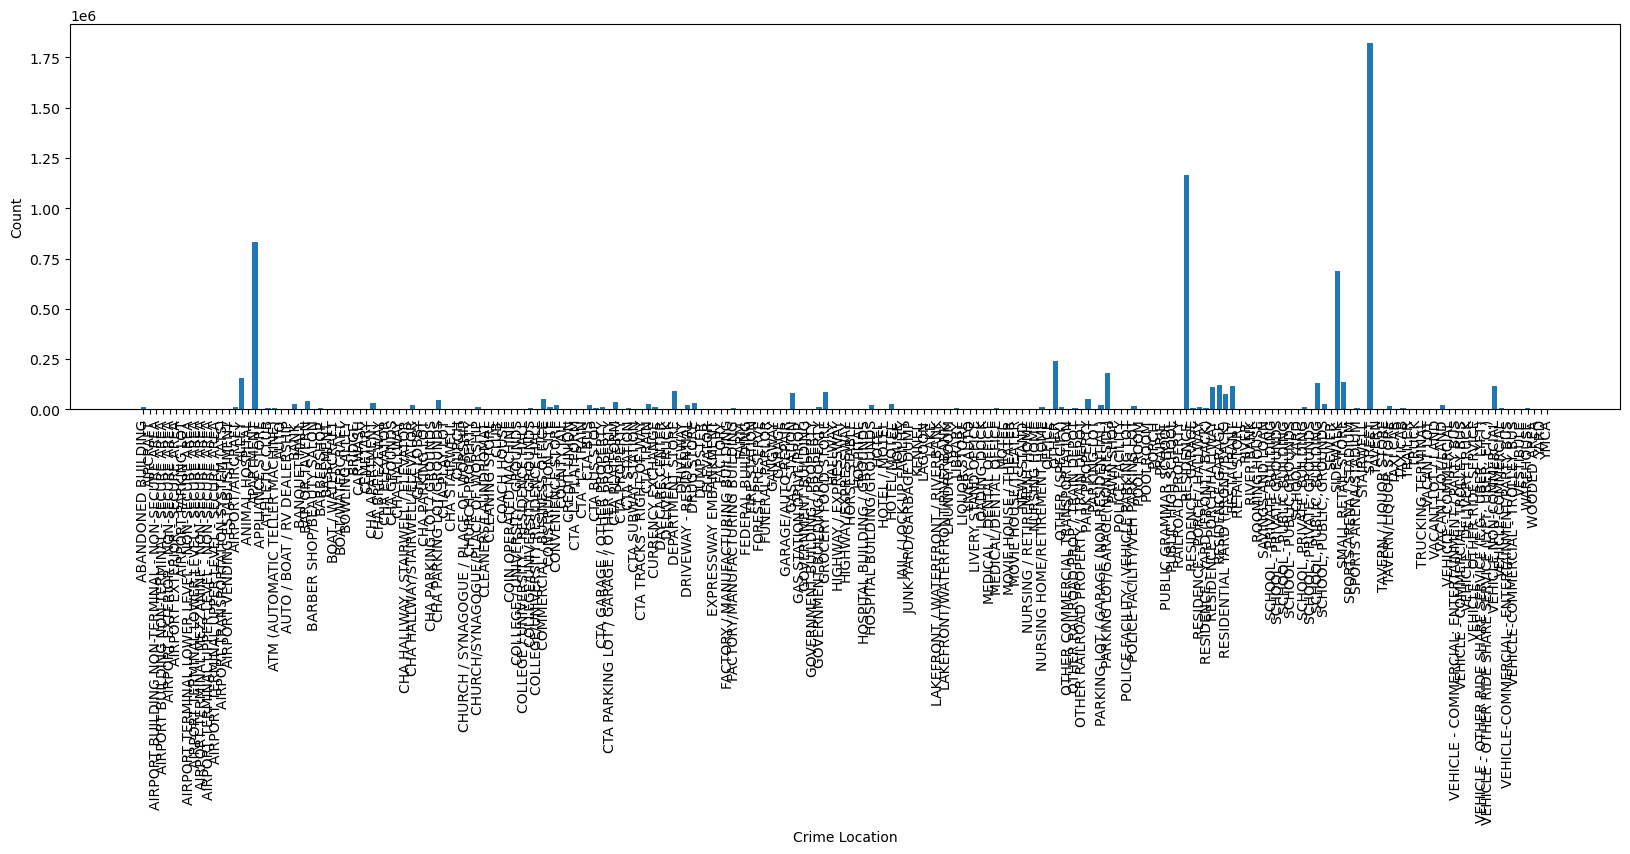

In [53]:
#visualising the most popular crime location

crime = [crime for crime, df in popcrimesloc]

plt.figure(figsize=(20, 5))
plt.bar(crime, mostpopcrimesloc)
plt.xticks(crime, rotation = 'vertical')
plt.ylabel("Count")
plt.xlabel("Crime Location")
plt.show()

Street is most unsafe location in Chicago, with highest number of crimes. The second most unsafe location is Residence and third most is Apartment. It reflects people are neither unsafe in the homes nor outside in public streets.

# Conclusion

We have analyzed the trend of criminal activities in the city of Chicago, during the period 2001 to 2021. Unfortunately, year 2003 has been the most notorious one. But, the residents must be feeling safer lately.

Theft and Battery were the most notorious criminal activities in Chicago. It is followed by Criminal Damage, Narcotics, Other Offence and Robbery. 

Street turned out to be the most unsafe place, in terms of crime count. This was followed by Residence and Apartment.

Moreover, the crimes peaked during summer months in Chicago. This can possibly be attributed to severe weather conditions in winter. Also, to the Christmas celebrations where people get busy in festivities and refrain from crimes.

For future analysis, it will be worthwhile to identify unsafe communities in the city of Chicago. This can help the people looking to rent or buy property. Additionally, it can also help the property owners to tag their property at reasonable price. Moreover, it would be useful to have a column in the dataset indicating whether the crime committed was a hate crime or not.